In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import json
import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cwd = os.getcwd()

dir_as_list = cwd.split('/')
base_path=''
go = True
i=0
while go:
    base_path= base_path+dir_as_list[i]+'/'
    if dir_as_list[i]=='research':
        go = False
    i=i+1
    
rel_path = "sample-graphs/sourcecred_sourcecred.json"

abs_file_path = os.path.abspath(os.path.join(base_path, rel_path))

In [3]:
import sys
infra_path = 'infra/'
sys.path.insert(0, os.path.join(base_path, infra_path))
import import_graph as ig

In [4]:
with open(abs_file_path) as json_file:  
    data = json.load(json_file)

In [6]:
G = ig.json_to_graph(data)

In [5]:
iterations = 20


alpha = 0
seed = {n:1/len(G.nodes) for n in G.nodes}
self_loop_wt = 1/1000


In [6]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=True,
                         self_loop_wt=self_loop_wt)

(array([2.000e+00, 2.000e+00, 1.000e+00, 6.100e+01, 2.197e+03, 1.701e+03,
        9.950e+02, 5.620e+02, 5.340e+02, 2.100e+01, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00]),
 array([-6.62996101, -6.22943603, -5.82891105, -5.42838607, -5.0278611 ,
        -4.62733612, -4.22681114, -3.82628616, -3.42576119, -3.02523621,
        -2.62471123, -2.22418626, -1.82366128, -1.4231363 , -1.02261132,
        -0.62208635]),
 <a list of 15 Patch objects>)

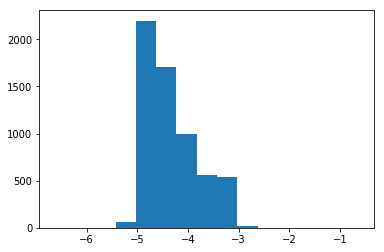

In [7]:
plt.hist(np.log10(r), bins = 15)

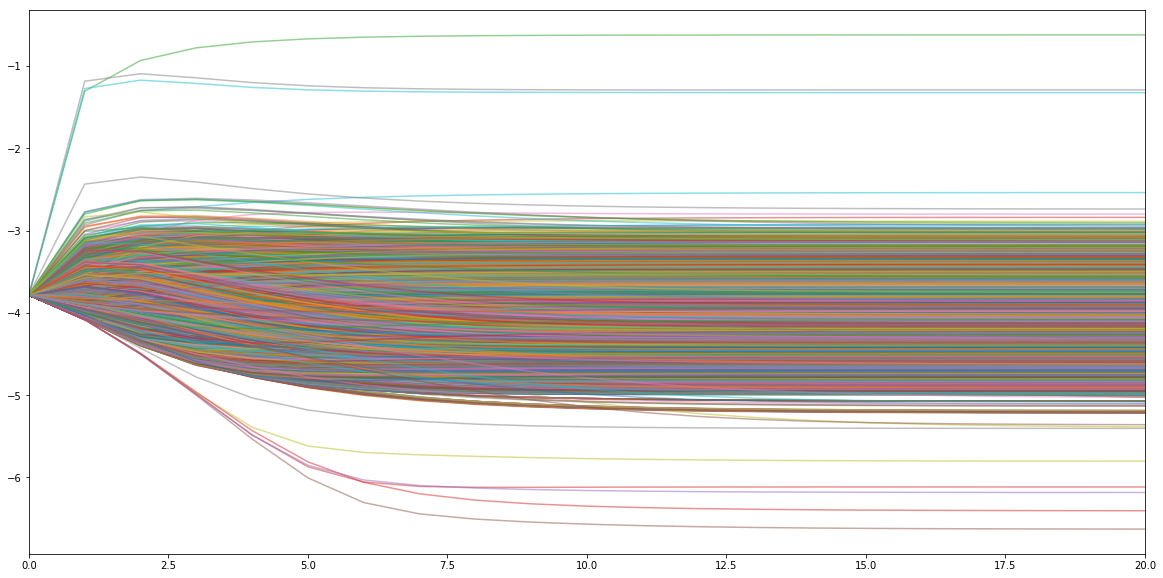

In [8]:
df.apply(np.log10).plot(legend=False, figsize=(20,10),alpha=.5)

In [9]:
top25 = list(df.T.reset_index().sort_values(iterations).tail(25).index)

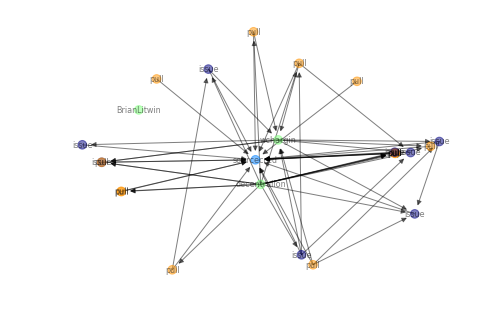

In [10]:
isg.inspectSubGraph(G, top25, expand=False, verbose=False, label=True,pos = "kk")

In [11]:
df.sum(axis=1)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
dtype: float64

(array([8.000e+00, 1.476e+03, 2.801e+03, 1.634e+03, 1.530e+02, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([-0.30016227,  0.07160218,  0.44336663,  0.81513108,  1.18689553,
         1.55865998,  1.93042443,  2.30218889,  2.67395334,  3.04571779,
         3.41748224]),
 <a list of 10 Patch objects>)

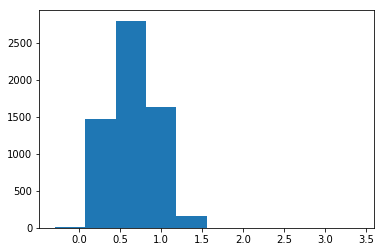

In [12]:
plt.hist([np.log10(v) for v in list(nx.get_node_attributes(G,'total_wt').values())])

In [13]:
r

array([1.07390514e-04, 1.14375952e-04, 1.06215793e-04, ...,
       5.12005035e-02, 8.73835233e-04, 8.22696680e-06])